<a href="https://colab.research.google.com/github/KodingNextFC/FC-AI-Program/blob/main/%5BTeachers_Only%5D_Pollution_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Data Understanding

##1.1 Load the Dataset

Air Pollution is contamination of the indoor or outdoor environment by any chemical, physical or biological agent that modifies the natural characteristics of the atmosphere. Household combustion devices, motor vehicles, industrial facilities and forest fires are common sources of air pollution. Pollutants of major public health concern include particulate matter, carbon monoxide, ozone, nitrogen dioxide and sulfur dioxide. Outdoor and indoor air pollution cause respiratory and other diseases and are important sources of morbidity and mortality.

This dataset provides geolocated information about the following pollutants:


*   **Nitrogen Dioxide [NO2]** : Nitrogen Dioxide is one of the several nitrogen oxides. At the surface level, however, NO2 forms from cars, trucks and buses emissions, power plants and off-road equipment. Exposure over short periods can aggravate respiratory diseases, like asthma.


*   **Ozone [O3]** : The Ozone molecule is harmful for outdoor air quality (if outside of the ozone layer). Differently from the good ozone located in the upper atmosphere, ground level ozone can provoke several health problems like chest pain, coughing, throat irritation and airway inflammation.


*   **Carbon Monoxide [CO]** : Carbon Monoxide is a colorless and odorless gas. Outdoor, it is emitted in the air above all by cars, trucks and other vehicles or machineries that burn fossil fuels


*   **Particulate Matter [PM2.5]** : Atmospheric Particulate Matter, also known as atmospheric aerosol particles, are complex mixtures of small solid and liquid matter that get into the air. If inhaled they can cause serious heart and lungs problem. PM2.5 refers to those particles with a diameter of 2.5 micrometers or less.



In [95]:
import pandas as pd
url = "https://drive.google.com/uc?export=download&id=1cpeWL3axUyrMZeNlMHsLrqXJ4pxD9sW-"
df = pd.read_csv(url)
df.sample(5)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
20605,Russian Federation,Vidnoye,66,Moderate,1,Good,24,Good,12,Good,66,Moderate
5266,India,Nohar,500,Hazardous,1,Good,41,Good,0,Good,500,Hazardous
21473,India,Pithapuram,113,Unhealthy for Sensitive Groups,3,Good,38,Good,4,Good,113,Unhealthy for Sensitive Groups
20716,France,Tournon Sur Rhone,57,Moderate,1,Good,49,Good,0,Good,57,Moderate
2011,Italy,Apricena,41,Good,2,Good,40,Good,4,Good,41,Good


##1.2 Features (Columns)



*   **Country**: Name of the country

*   **City** : Name of the city

*   **AQI Value** : Overall AQI value of the city

*   **AQI Category**: Overall AQI category of the city

*   **CO AQI Value**: AQI value of Carbon Monoxide of the city

*   **CO AQI Category** : AQI category of Carbon Monoxide of the city

*   **Ozone AQI Value**: AQI value of Ozone of the city

*   **Ozone AQI Category** : AQI category of Ozone of the city

*   **NO2 AQI Value** : AQI value of Nitrogen Dioxide of the city

*  **NO2 AQI Category** : AQI category of Nitrogen Dioxide of the city

*   **PM2.5 AQI Value** : AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city

*   **PM2.5 AQI Category** : AQI category of Particulate Matter with a diameter of 2.5 micrometers or less of the city


These datas are collected from elichens.com



What are the features (columns) of the dataset?

In [96]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

##1.3 Data Info

What is the shape of the dataset, how many rows does it have, and what are the data types of the columns?

In [97]:
df.shape

(23463, 12)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


#2 Data Visualization

##2.1 Regression Line Plot

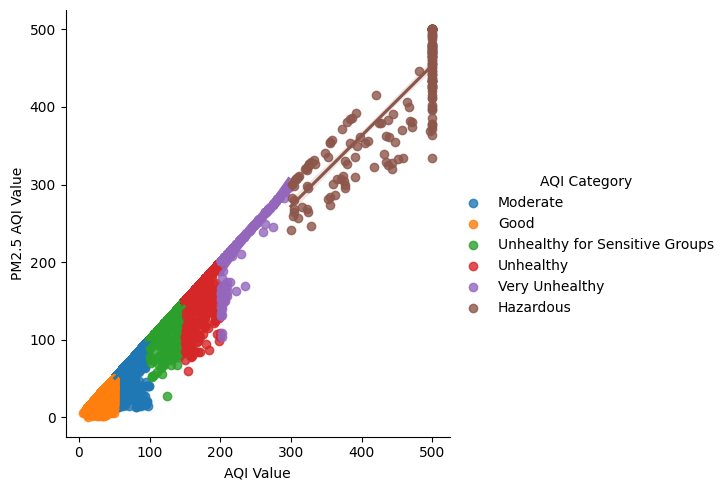

In [99]:
# PM 2.5 and AQI Value
import seaborn as sns
sns.lmplot(data=df,y='PM2.5 AQI Value',x='AQI Value',hue="AQI Category");


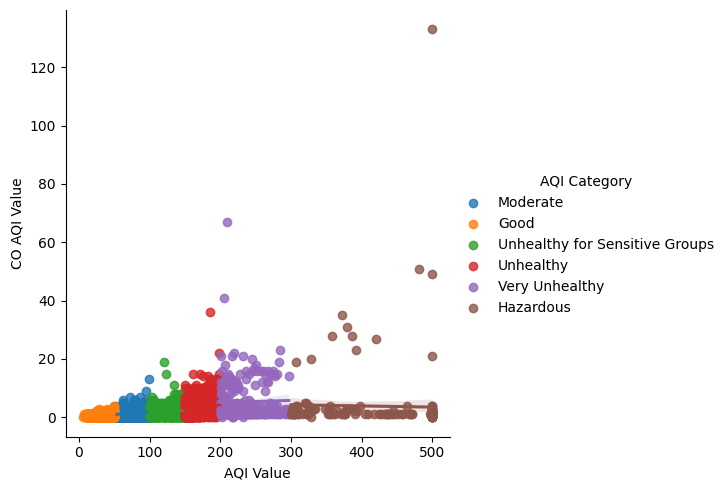

In [100]:
# CO AQI and AQI Value
import seaborn as sns
sns.lmplot(data=df,y='CO AQI Value',x='AQI Value',hue="AQI Category");


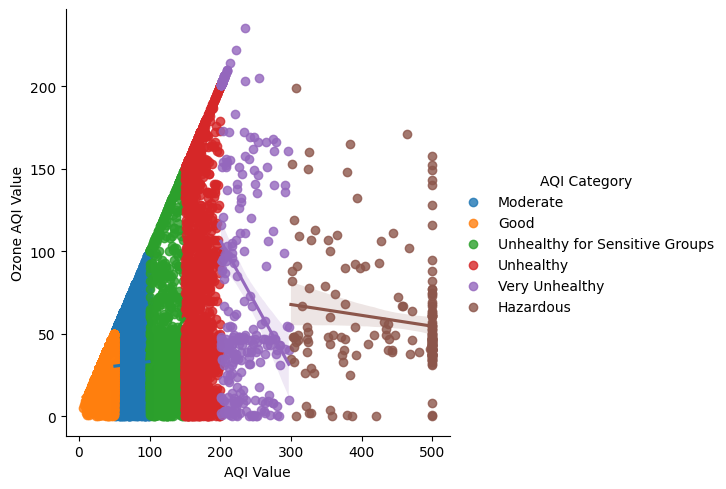

In [101]:
# Ozon AQI and AQI Value
import seaborn as sns
sns.lmplot(data=df,y='Ozone AQI Value',x='AQI Value',hue="AQI Category");


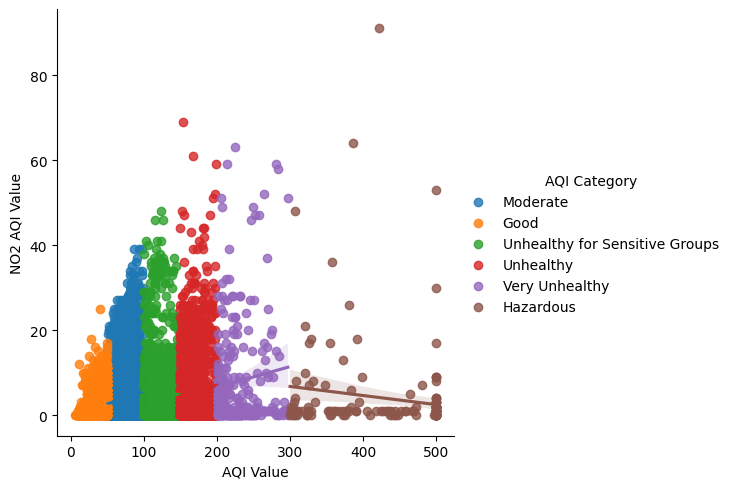

In [102]:
# NO2 AQI and AQI Value
import seaborn as sns
sns.lmplot(data=df,y='NO2 AQI Value',x='AQI Value',hue="AQI Category");


##2.2 Correlation Heatmap

<Axes: >

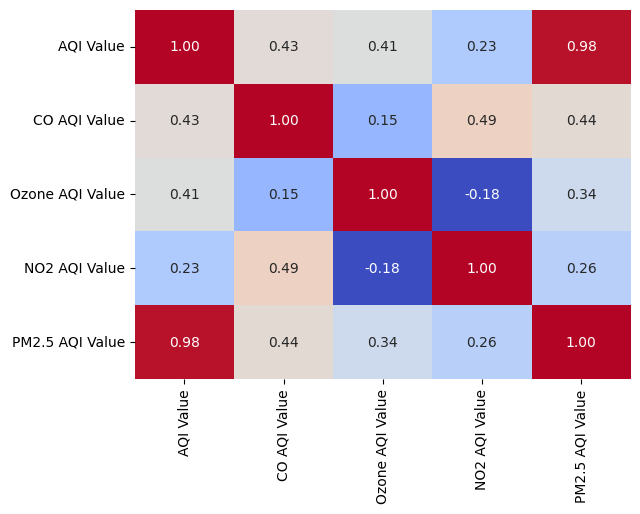

In [103]:
corr_matrix = df[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].corr()
sns.heatmap(corr_matrix,annot=True, cbar=False, cmap='coolwarm', fmt='.2f')



*   PM2.5 has an extremely strong positive correlation with AQI. This means that PM2.5 levels almost directly determine AQI. Higher PM2.5 levels lead to a much worse AQI.

*   CO and Ozone have a moderate impact, suggesting they influence AQI but are not the primary contributors.

*   NO₂ has the weakest correlation (0.23), indicating it plays a minor role in affecting overall air quality.




#3.Handling Missing Values

Are there any missing values in the dataset?

In [104]:
df.isnull().sum()

,0
Country,427
City,1
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [105]:
df.dropna(axis=1, inplace=True)  # Removes columns with NaN values permanently
df.isnull().sum()  # Check remaining missing values

,0
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0
PM2.5 AQI Value,0
PM2.5 AQI Category,0


In [115]:
df.sample(5)

,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
17821,132,Unhealthy for Sensitive Groups,3,Good,132,Unhealthy for Sensitive Groups,1,Good,127,Unhealthy for Sensitive Groups
8943,44,Good,1,Good,41,Good,0,Good,44,Good
13093,27,Good,0,Good,27,Good,1,Good,25,Good
4394,47,Good,1,Good,47,Good,3,Good,42,Good
12854,68,Moderate,1,Good,38,Good,1,Good,68,Moderate


#4.Feature Selection

In [106]:
# Features
x = df[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]

# Target
y = df['AQI Value']

#5.Data Splitting

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#6.Training Model Using Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x_train, y_train)
y_pred = regression.predict(x_test)

#7.Model Evaluation

In [110]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
MAE= metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 4.803756253181956


**Interpretation:**

Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values in a regression model. A lower MAE indicates better model performance.

The mean absolute error is 4.8. It means that, on average, the predicted AQI values deviate by 4.8 points from the actual values, which may be acceptable for broad trends but could impact precision in detailed analysis.

#8.Pollution Predictor

In [111]:
import numpy as np

def predict_aqi():
    """
    Asks the user for AQI values one by one, predicts the AQI Value using the trained model,
    and categorizes the result.
    """
    co_aqi = float(input("Enter CO AQI Value: "))
    ozone_aqi = float(input("Enter Ozone AQI Value: "))
    no2_aqi = float(input("Enter NO2 AQI Value: "))
    pm25_aqi = float(input("Enter PM2.5 AQI Value: "))

    # Create an input array with the correct feature order
    input_features = np.array([[co_aqi, ozone_aqi, no2_aqi, pm25_aqi]])

    # Predict AQI Value using the trained model
    predicted_aqi = regression.predict(input_features)[0]

    # Get AQI category
    if predicted_aqi <= 50:
        aqi_category = "Good"
    elif predicted_aqi <= 100:
        aqi_category = "Moderate"
    elif predicted_aqi <= 150:
        aqi_category = "Unhealthy for Sensitive Groups"
    elif predicted_aqi <= 200:
        aqi_category = "Unhealthy"
    elif predicted_aqi <= 300:
        aqi_category = "Very Unhealthy"
    else:
        aqi_category = "Hazardous"

    print(f"\nPredicted AQI Value: {predicted_aqi:.2f}")
    print(f"AQI Category: {aqi_category}")

In [112]:
# Run the function
predict_aqi()

Enter CO AQI Value: 1
Enter Ozone AQI Value: 21
Enter NO2 AQI Value: 6
Enter PM2.5 AQI Value: 61

Predicted AQI Value: 62.29
AQI Category: Moderate
